In [711]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tag import pos_tag
from nltk.tokenize import WordPunctTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from collections import Counter
import json

from encryptedpickle import encryptedpickle
import pickle
from facepy import GraphAPI
import credentials
from geotext import GeoText

from datetime import datetime, timedelta
import calendar

import matplotlib.pyplot as plt
%matplotlib inline

In [509]:
# Write retrieved data to pickle file

encoder = encryptedpickle.EncryptedPickle(signature_passphrases=credentials.passphrases,
                                         encryption_passphrases=credentials.passphrases)

encryption = {
    # Add new encryption algorithm specification with id = 255.
    # Default algorithms can not be overridden so we must use some other
    # id, maybe best starting with 255 (maximum id) and decreasing by one
    # for next added algorithm.
    255: {
        # Algorithm name defined in EncryptedPickle.ALGORITHMS.
        'algorithm': 'aes-256-cbc',

        # Salt size for PBKDF2 key.
        'salt_size': 32,

        # Digest mode for PBKDF2 key.
        'pbkdf2_algorithm': 'sha256',

        # Use 10 iterations in PBKDF2 key generation.
        'pbkdf2_iterations': 10,
    },
}

encoder.set_algorithms(encryption=encryption)



In [3]:
graph = GraphAPI(credentials.fbtoken)

In [4]:
content = graph.get('/10153515548171271/feed')

In [5]:
content

{u'data': [{u'actions': [{u'link': u'https://www.facebook.com/10153515548171271/posts/10154561134711271',
     u'name': u'Comment'},
    {u'link': u'https://www.facebook.com/10153515548171271/posts/10154561134711271',
     u'name': u'Like'}],
   u'created_time': u'2016-11-08T16:47:09+0000',
   u'from': {u'id': u'10153515548171271', u'name': u'Aaron Kim'},
   u'id': u'10153515548171271_10154561134711271',
   u'is_expired': False,
   u'is_hidden': False,
   u'likes': {u'data': [{u'id': u'10153119020437345', u'name': u'Queena Kim'},
     {u'id': u'10106326331063768', u'name': u'Jon A. Jo'},
     {u'id': u'10154972940430646', u'name': u'Rosette K. Lee'},
     {u'id': u'10203646744908206', u'name': u'David C. Lee'},
     {u'id': u'989136211139371', u'name': u'Efren Fradejas'},
     {u'id': u'428760387268799', u'name': u'Mark Kang'},
     {u'id': u'10153481552898825', u'name': u'Edward Chang'},
     {u'id': u'10101235205879531', u'name': u'Suzy Yim'},
     {u'id': u'10152947140887478', u'nam

In [6]:
sealed = encoder.seal(graph.get('/10153515548171271/feed'))

In [7]:
print("* sealed: %s" % sealed)

* sealed: EPAQAAAAABAAAAQ2M9OOxzjQk1a2hclaSqZW3j1kr7SxUj6gKj36KxwaH9vyi_N3jdFsPux3HuFDptNel-kUbMrhCtsvn0kZmdCykF9LZYK9seBoOk_gtGQOP68yLIUtrfdOglAUwFnMYzM47cbxQIHrvzcDebwsdrZ_1aryy8oT9Vn2vaC-ZxGPt7xKn9QdEvG77EA564ZpFFOJmMpK9gcMnWl-XyeI3s9_rzvNVtILJyNrjwYQvQYdJW2YHkMsU5EZ308H3ihTsB6z1yzUt8ZNmI9sGmxkNDRAtggy3Vp7-Hb1U34Dzxlt2Gh7zutPaflPZYMp-WLV1wcMMVKRUP-ajibziPwxFcjvCGdL4kGIqdf_F5EemBWyx3K_PFdoIEGIpbLImQN71LSeGjpIu-5Kq9WLGGypMRIOuCbU4XQ0qN2QmkbTF7T1Ur1iYpTgKvlK64GjC6oiFEIek0WI3SL8Zv8SfEod45aYeXoc-0qAiUTPNkatq5eOI9tu0aCvmDQg32hCu3jIg0-bxzjMbgMYzt-Nn2qZmAtwA4H4Vcc5ISPnp93LY9bKfYoH-16qGMqixxhqWhTTrJIl2dm7jonZCVMOwqVpykI9HjoXOvEp7Y8Yk0l9HD6Iqxy8o9AssayvH6clBM0i6lKjYEKhue6CUm6HZKxpJQXbh7nghAqOKa6ksY7BWdFWZT3lznNGHi1hnM-TwjLSdD_lgjR--XAUrFfotQf5OjtKABqdk-pxhkbufVv2DUOGCRmQkTKivRc55cFt3dtkZVc2Nohvuj71dKpex8Ozk-xa4PBRbbnu_6TRUlizCEQhc7tQdzTcpQFYeKlsAMDQD2akTiADxOBatquqP1Rdja20CLtFuVoWWZdETc6PGYIMjBF3wJMLfTYqODlEje5_2A3phFabnQZD9FEgT7Ati82flPQ7bE4Y7UdMymbiDLVOrGCUyFqsGVpY83wG1PY9QRrRlEhOdjcBIbsRsj

In [8]:
with open('fbfeed.p','wb') as fp:
    pickle.dump(sealed,fp)

In [3]:
# Loading pickle data from file (if necessary)

with open('fbfeed.p','rb') as fp:
    sealedcontent = pickle.load(fp)

unsealed = encoder.unseal(sealedcontent)

In [4]:
type(unsealed)

dict

In [5]:
locations = {}

messages = []

for post in unsealed['data']:
    try:
        print 'Title:%s'%post['name']
        print 'Time:%s'%post['created_time']
        print 'Message:%s'%post['message']
        print 'Location:%s'%post['place']['location']
        locations.update({post['created_time']:post['place']['location']})
    except:
        pass
    print "-------"


-------
Title:Instagram photo by Aaron Kim • Nov 8, 2016 at 4:46pm UTC
Time:2016-11-08T16:46:25+0000
Message:Had to do my part to make sure no  burgers were dropped today. Get yours!
-------
-------
-------
Title:Instagram photo by Aaron Kim • Nov 1, 2016 at 5:42am UTC
Time:2016-11-01T05:42:35+0000
Message:Tagged along for a Halloween hike w the good folks at Christfit. Good way to start the week! But it's already November. Where'd the year go??
Location:{'city': 'Altadena', 'zip': '91001', 'country': 'United States', 'longitude': -118.13054080357, 'state': 'CA', 'latitude': 34.204032626371}
-------
Title:Instagram photo by Aaron Kim • Oct 29, 2016 at 9:13pm UTC
Time:2016-10-29T21:17:43+0000
Message:Was looking for a costume but took a detour and got distracted. 😬
Location:{'city': 'Los Angeles', 'zip': '90012', 'country': 'United States', 'longitude': -118.24051062316, 'state': 'CA', 'street': '134 Japanese Village Plaza, Bldg E', 'latitude': 34.048925395375}
-------
-------
Title:Kmo

In [6]:
locations

{'2016-10-29T21:17:43+0000': {'city': 'Los Angeles',
  'country': 'United States',
  'latitude': 34.048925395375,
  'longitude': -118.24051062316,
  'state': 'CA',
  'street': '134 Japanese Village Plaza, Bldg E',
  'zip': '90012'},
 '2016-11-01T05:42:35+0000': {'city': 'Altadena',
  'country': 'United States',
  'latitude': 34.204032626371,
  'longitude': -118.13054080357,
  'state': 'CA',
  'zip': '91001'}}

In [7]:
fblocdata = []
columns = []

for timestamp in locations.keys():
    columns = locations[timestamp].keys() if len(locations[timestamp].keys()) > len(columns) else columns
    
    fbdataholder= []
    for title in columns:
        try:
            fbdataholder.append(locations[timestamp][title])
        except:
            fbdataholder.append('nan')
    
    fblocdata.append(fbdataholder)

fblocdf = pd.DataFrame(fblocdata,columns=columns)
    
print 'Given the available Facebook post data, the following location data is available:'
fblocdf

Given the available Facebook post data, the following location data is available:


,city,zip,country,longitude,state,street,latitude
0,Los Angeles,90012,United States,-118.240511,CA,"134 Japanese Village Plaza, Bldg E",34.048925
1,Altadena,91001,United States,-118.130541,CA,nan,34.204033


In [477]:
datetime.now()

datetime.datetime(2016, 11, 17, 14, 46, 59, 904460)

In [497]:
        columns=['timestamp','chal_type','attempts','passfail']
        user_df = pd.DataFrame(columns=columns)
        

In [498]:
user_df

,timestamp,chal_type,attempts,passfail


In [507]:
user_df.append(pd.Series([datetime.now(),'lbc','2','fail'],index=columns),ignore_index=True)

,timestamp,chal_type,attempts,passfail
0,2016-11-17 16:10:32.375663,lbc,2,fail


In [ ]:
## Sample code for question selection

elements = ['one', 'two', 'three']
weights = [0.7, 0.1, 0.2]

from numpy.random import choice
print choice(elements, p=weights)

In [481]:
user_df

,timestamp,chal_type,attempts,passfail
login_attempt_id,NaN,NaN,NaN,NaN


In [ ]:

class authenticating_user():
    
    def __init__:
        self.time=datetime.now()
        self.ctype=None
        self.attempts=0
        self.passfail=0
    
    def log_new_attempt(self, chal_type, attempts, passfail):
        self.ctype=chal_type
        self.attempts=attempts
        self.passfail=passfail
        
    def init_new_datafile(self):
        columns=['login_attempt_id','timestamp','chal_type','attempts','passfail']
        user_df = pd.DataFrame(columns=columns)
        

# ==== LOCATION BASED CHALLENGE (LBC) ====

The concept of this approach is to take user location data (if available) and try to build a challenge option based on the location data available.

Google maps user location history is enabled by default and running in the background, so it's reasonable to assume this data is readily available.

Some things to consider when deciding to include an LBC are:
- Date of last location : for now, the null hypothesis/assumption about the user's ability to retain their own location information is that they will be able to recall where they were with reasonable accuracy for up to three days worth of history. This assumption will need to be tested and will need to be updated accordingly in effort to improve the location recollection success rate over time.
- If the data is a pair of geographic coordinates but no specific business/name reference, is there user history with reference to any businesses or other frequent markers that can be tied to the user? 
    - eg: have a pair of coordinates for the corner of Washington and Hill. There is a subway, chinese restaurant, mcdonalds, courthouse, and maker city LA/General Assembly. Is there user history to suggest which one (or more) of these were visited by the user? 

## Source : Google Maps Data

In [566]:
g_loc_hist_raw = pd.read_json('LocationHistory.json')

In [567]:
len(g_loc_hist_raw)

140

In [1071]:
# Added new data available from 11/07

g_loc_hist2_raw = pd.read_json('LocationHistory-20161107.json')

# Test for updated location data imported on 11/21
#g_loc_hist2_raw = pd.read_json('LocationHistory-20161121.json')


In [1072]:
len(g_loc_hist2_raw)

502

In [1073]:
gmaps_columns = ['timestamp','lat','lng','acc','vel','heading','altitude','v_acc']

In [1074]:
# Google maps location does not include the decimal point. 
# The code below is to set the offset programmatically in 
# case there is a need to do so in the future. 

gmaps_coord_disp = 10.**7

In [1075]:
def pandify_gloc_data(data, columns, geodisp = 10.**7):
    loc_hist = []
        
    for datapoint in data:
#         print datetime.fromtimestamp((int(datapoint['timestampMs'])/1000)).strftime('%Y-%m-%d %H:%M:%S')
#         pass
        try:
            timestamp = datetime.fromtimestamp((int(datapoint['timestampMs'])/1000)).strftime('%Y-%m-%d %H:%M:%S')
        except:
            timestamp = ''
        try:
            lat = datapoint['latitudeE7']/(geodisp)
        except:
            lat = '0'
        try:
            lng = datapoint['longitudeE7']/(geodisp)
        except:
            lng = '0'
        try:
            alt = datapoint['altitude']
        except:
            alt = '0'
        try:
            v_acc = datapoint['verticalAccuracy']
        except:
            v_acc = '0'
        try:
            vel = datapoint['velocity']
        except:
            vel = '0'
        try:
            heading = datapoint['heading']
        except:
            heading = '0'
        try:
            acc = datapoint['accuracy']
        except:
            acc = '0'

        loc_hist.append([timestamp, lat, lng, acc, vel, heading, alt, v_acc])
    
    
    return pd.DataFrame(loc_hist, columns=columns)
    

In [1076]:
gloc_hist = pandify_gloc_data(g_loc_hist_raw['locations'],gmaps_columns,gmaps_coord_disp)

In [1077]:
gloc_hist.head(10)

,timestamp,lat,lng,acc,vel,heading,altitude,v_acc
0,2016-10-30 15:10:58,34.066658,-118.314842,10,12,333,67,4
1,2016-10-30 15:09:45,34.066535,-118.314814,43,0,0,0,0
2,2016-10-30 15:08:16,34.062415,-118.314190,10,15,3,61,4
3,2016-10-30 15:06:07,34.052689,-118.309767,5,15,270,60,12
4,2016-10-30 15:04:00,34.052777,-118.297520,10,2,270,98,32
5,2016-10-30 15:03:40,34.052990,-118.296021,29,0,0,0,0
6,2016-10-30 13:45:19,34.052913,-118.296064,65,0,0,92,48
7,2016-10-30 13:23:02,34.053039,-118.296075,40,0,0,0,0
8,2016-10-30 13:21:27,34.052142,-118.287942,10,10,266,68,4
9,2016-10-30 13:17:39,34.059100,-118.282748,10,6,271,86,4


In [1078]:
gloc_hist.tail()

,timestamp,lat,lng,acc,vel,heading,altitude,v_acc
135,2016-10-28 09:03:31,34.031147,-118.265579,75,0,0,63,10
136,2016-10-28 08:46:13,34.031180,-118.266102,65,0,0,61,11
137,2016-10-28 08:43:01,34.031125,-118.266337,73,0,0,0,0
138,2016-10-28 08:38:02,34.029564,-118.268051,10,1,31,66,4
139,2016-10-28 08:33:21,34.029688,-118.270350,30,3,341,67,4


In [1079]:
X = np.array(gloc_hist['lat'])
y = np.array(gloc_hist['lng'])

###  ------------ LBC Subsection - EDA - Dimension Validation ---------------

It may be conceptually logical that user location history is a predictable pattern, we need to verify that there is enough of a pattern upon which we can base one this dimension of user behavior. One such method is to inspect the data by plotting the geolocation points over a series of actual-data plots as well as scaled/clustered plots. If the visualizations show that there is no reasonable clustering of data points or that the user's location history is too "sparse" (that is, the user's location is too erratic to determine a location pattern), then it would be reasonable to conclude that user location is not a viable dimension of user behavior modeling.

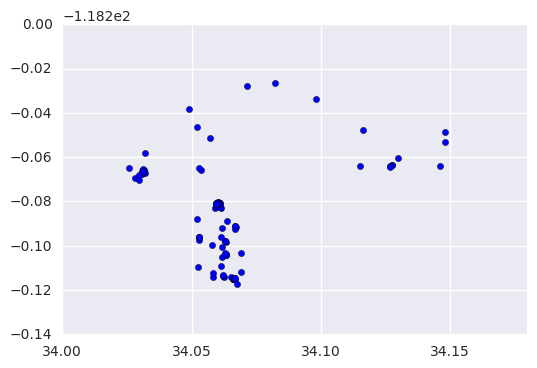

In [1080]:
# Rough scatter plot of initial dataset 

plt.scatter(X,y)

In [1081]:
from sklearn import preprocessing

In [1082]:
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

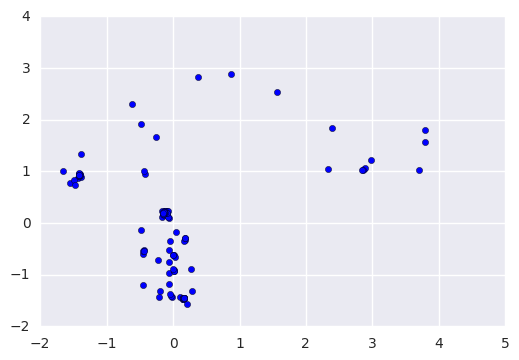

In [1083]:
plt.scatter(X_scaled, y_scaled)

In [1084]:
gloc_hist_alt = pandify_gloc_data(g_loc_hist2_raw['locations'],gmaps_columns,gmaps_coord_disp)

In [1085]:
gloc_hist_alt.head(4)

,timestamp,lat,lng,acc,vel,heading,altitude,v_acc
0,2016-11-07 18:07:21,34.066386,-118.314777,5,0,0,63,16
1,2016-11-07 18:07:21,34.066391,-118.314760,34,0,0,0,0
2,2016-11-07 17:23:39,34.036402,-118.308978,10,2,238,58,24
3,2016-11-07 14:43:53,34.031227,-118.265898,53,0,0,0,0


In [1086]:
gloc_hist_alt = gloc_hist_alt[(gloc_hist_alt['timestamp'] > datetime.now() - timedelta(days=14))]

TypeError: can't compare datetime.datetime to str

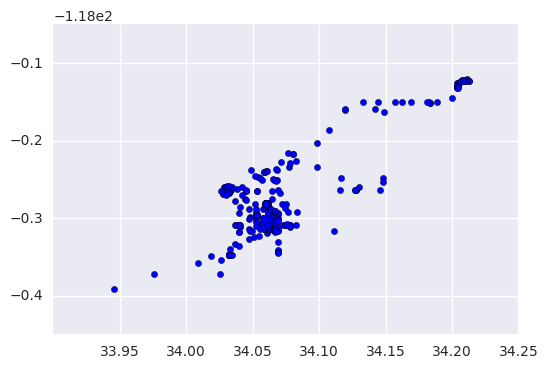

In [1087]:
# Rough scatter plot

plt.scatter(gloc_hist_alt['lat'],gloc_hist_alt['lng'])

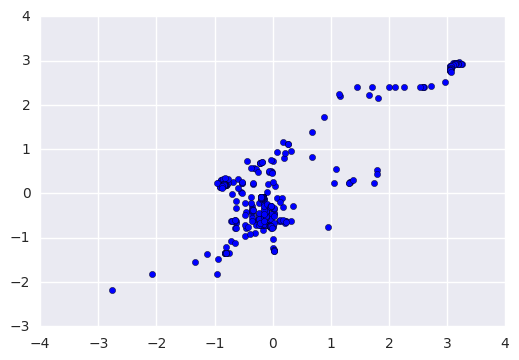

In [1088]:
# Re-scaled scatter plot

plt.scatter(preprocessing.scale(np.array(gloc_hist_alt['lat'])), \
            preprocessing.scale(np.array(gloc_hist_alt['lng'])))

In [1089]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import cluster, preprocessing, metrics

In [1090]:
geoc = np.array(gloc_hist_alt[['lat','lng']])

In [1091]:
kmlist = []

for n in range(2,100):
    lkm = KMeans(n_clusters=n)
    ltkm = lkm.fit(geoc)
    ltkm_score = metrics.silhouette_score(geoc, ltkm.labels_, metric='euclidean')
    kmlist.append([n,ltkm_score])
    #print "K:%s - Silhouette:%s"%(n,ltkm_score)

In [1097]:
#dir(ltkm)

In [1093]:
klist = np.array(kmlist)

In [1094]:
np.amax(klist[3:100,1])

0.69838695717280996

In [1095]:
for n in klist:
    if n[1]==np.amax(klist[3:100,1]):
        n_max =n[0]
        sc_max = np.amax(klist[3:100,1])
        print "n-cluster matching max sil score : %s"%n[0]

n-cluster matching max sil score : 65.0


(0.5, 0.725)

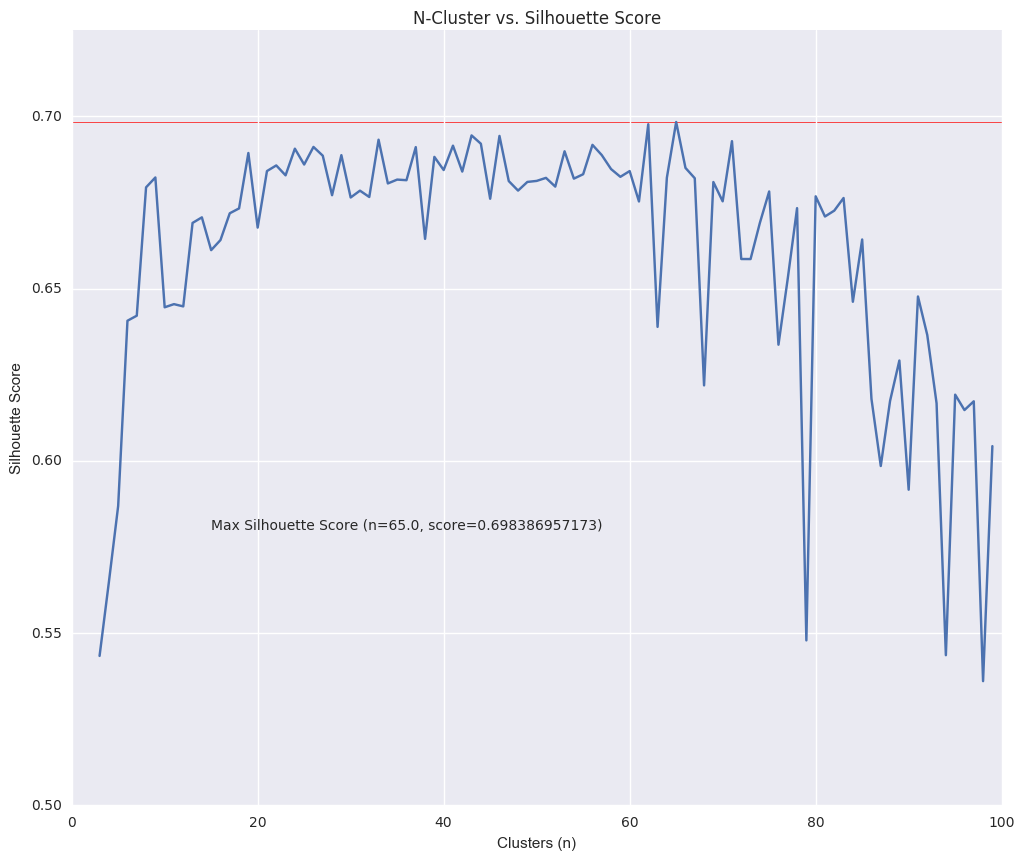

In [1096]:
plt.figure(figsize=(12,10))
plt.plot(klist[1:,0],klist[1:,1])
plt.axhline(y=sc_max,c="red",linewidth=0.5,zorder=0)
plt.annotate('Max Silhouette Score (n=%s, score=%s)'%(n_max,sc_max), xy=(n_max, sc_max), xytext=(15, 0.58))
plt.title("N-Cluster vs. Silhouette Score")
plt.xlabel("Clusters (n)")
plt.ylabel("Silhouette Score")
plt.ylim(.5, 0.725)

In [1098]:
lkm = KMeans(n_clusters=int(n_max))

In [1099]:
ltkm = lkm.fit(geoc)

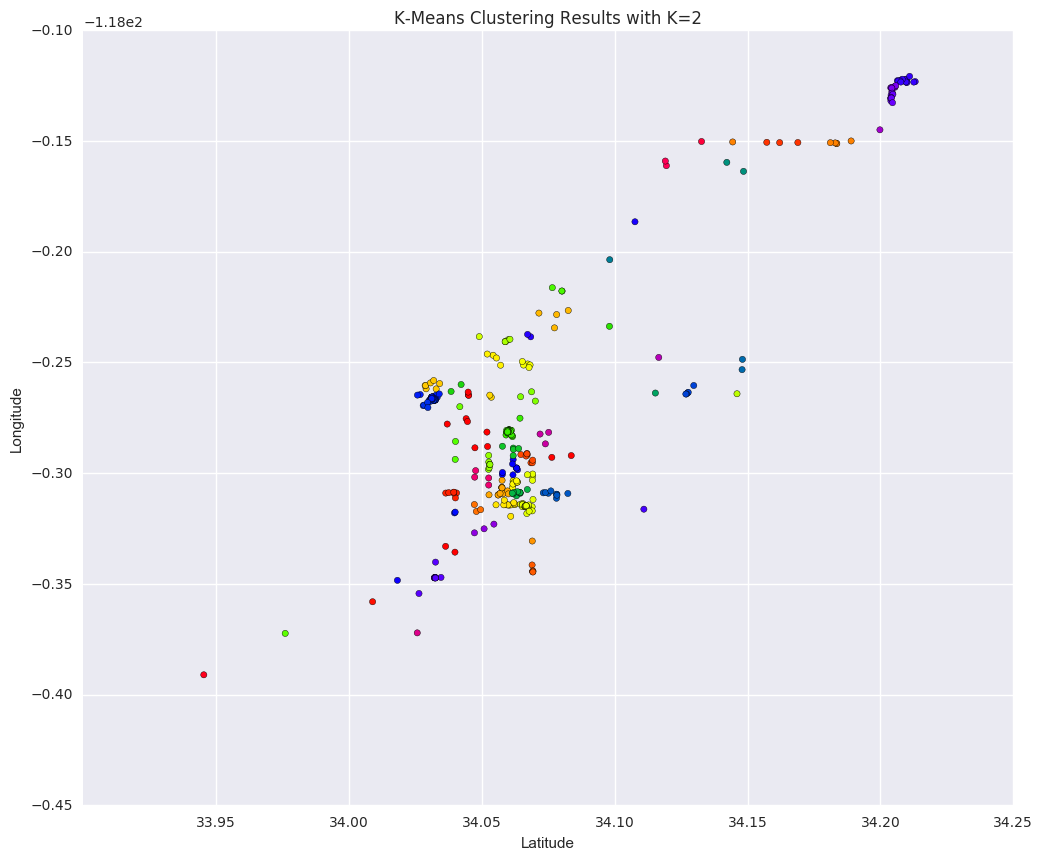

In [1100]:
plt.figure(figsize=(12,10))
plt.scatter(geoc[:,0], geoc[:,1], c=ltkm.labels_, cmap=plt.cm.prism) 
plt.title('K-Means Clustering Results with K=2')
#plt.scatter(ltkm.cluster_centers_[:,0], ltkm.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)
plt.xlabel("Latitude")
plt.ylabel("Longitude")


In [1101]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

my_tsne = TSNE(n_components=2)

geoc_stand = StandardScaler().fit_transform(geoc)

loc_tsne = my_tsne.fit_transform(geoc_stand)

loc_tsne_df = pd.DataFrame({'X1':loc_tsne[:,0], 'X2':loc_tsne[:,1],'y':ltkm.labels_})

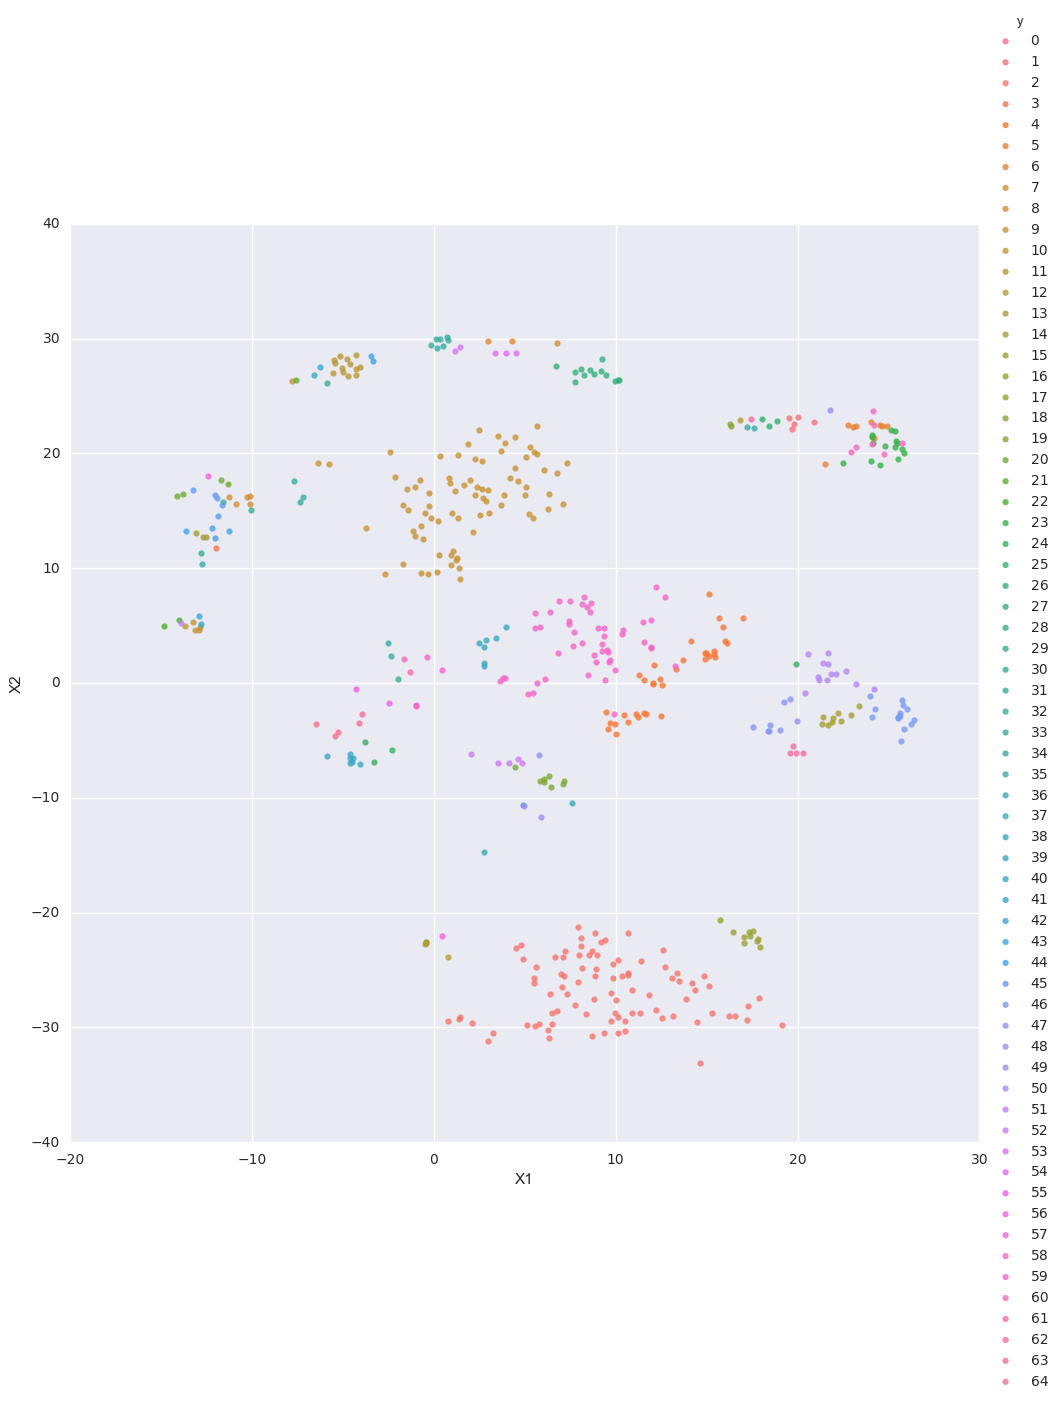

In [1102]:
import seaborn as sns

sns.lmplot('X1','X2',data=loc_tsne_df, fit_reg=False,hue='y', size=10)

In [1103]:
print "Dataset Start: %s"%gloc_hist_alt.tail(1)['timestamp'].values
print "Dataset Finish: %s"%gloc_hist_alt.head(1)['timestamp'].values

Dataset Start: ['2016-10-28 08:33:21']
Dataset Finish: ['2016-11-07 18:07:21']


### Section Conclusion

Though it may seem like a relatively high optimal 'n' given the number of data points, it is not outside the realm of reason that a user may have been located that many number of places over the timeframe of the data (11 days). 

Given that the points represent actual locations, the interpretation of the scatterplot is that during the observation period, the user traveled mainly between two points, but spent a lot of time in places inbetween the two points. The TSNE plot reveals that of the locations, there may be specific points of interest within the overall location data. 

This is ideal as we can work towards identifying those points of interest (POI) that the user may have a higher chance of recalling correctly. An "insignificant datapoint" (ie: data collected while the user was either in transit or sitting in traffic) which although could be considered a predictor of user behavior (ie: during evening commute, there amy be a point in the travel path in which there may be excessive traffic), may not be a particular point of interest for generating an LBC. User may not be able to easily recall the answer to "Where are you usually located at around XX:XX AM/PM?" if that location is a particular intersection. If a location is known/trained such as "home" or the name of the company where they work, the user may be more likely to recall the correct answer.

###  ------------ END of LBC Subsection - EDA - Dimension Validation ---------------

###  ------------ LBC Subsection - EDA - Finding POI ---------------

In [1104]:
# For the purposes of placing the user at a specific time, we will not need the velocity and heading. 
# For now, we will keep accuracy and vertical accuracy figures.

In [1105]:
#gloc_hist_alt = gloc_hist_alt.drop(['vel'], axis=1).drop(['altitude'], axis=1)

In [1106]:
gloc_hist_alt.head(10)

,timestamp,lat,lng,acc,vel,heading,altitude,v_acc
0,2016-11-07 18:07:21,34.066386,-118.314777,5,0,0,63,16
1,2016-11-07 18:07:21,34.066391,-118.314760,34,0,0,0,0
2,2016-11-07 17:23:39,34.036402,-118.308978,10,2,238,58,24
3,2016-11-07 14:43:53,34.031227,-118.265898,53,0,0,0,0
4,2016-11-07 14:06:17,34.031402,-118.265722,77,0,0,63,10
5,2016-11-07 13:40:24,34.031327,-118.266530,10,1,305,56,6
6,2016-11-07 08:57:21,34.031385,-118.266618,62,0,0,0,0
7,2016-11-07 08:57:02,34.032807,-118.261937,2000,0,0,61,20
8,2016-11-07 08:06:54,34.052506,-118.298265,10,0,0,34,16
9,2016-11-06 23:11:02,34.066417,-118.314795,27,0,0,0,0


In [1129]:
gloc_hist_alt['poi_id'] = ltkm.labels_

In [1130]:
gloc_hist_alt.head(10)

,timestamp,lat,lng,acc,vel,heading,altitude,v_acc,lat4,lng4,lat5,lng5,poi_id
0,2016-11-07 18:07:21,34.066386,-118.314777,5,0,0,63,16,34.0664,-118.3148,34.06639,-118.31478,2
1,2016-11-07 18:07:21,34.066391,-118.314760,34,0,0,0,0,34.0664,-118.3148,34.06639,-118.31476,2
2,2016-11-07 17:23:39,34.036402,-118.308978,10,2,238,58,24,34.0364,-118.3090,34.03640,-118.30898,31
3,2016-11-07 14:43:53,34.031227,-118.265898,53,0,0,0,0,34.0312,-118.2659,34.03123,-118.26590,59
4,2016-11-07 14:06:17,34.031402,-118.265722,77,0,0,63,10,34.0314,-118.2657,34.03140,-118.26572,59
5,2016-11-07 13:40:24,34.031327,-118.266530,10,1,305,56,6,34.0313,-118.2665,34.03133,-118.26653,4
6,2016-11-07 08:57:21,34.031385,-118.266618,62,0,0,0,0,34.0314,-118.2666,34.03138,-118.26662,4
7,2016-11-07 08:57:02,34.032807,-118.261937,2000,0,0,61,20,34.0328,-118.2619,34.03281,-118.26194,38
8,2016-11-07 08:06:54,34.052506,-118.298265,10,0,0,34,16,34.0525,-118.2983,34.05251,-118.29826,39
9,2016-11-06 23:11:02,34.066417,-118.314795,27,0,0,0,0,34.0664,-118.3148,34.06642,-118.31479,2


Based on the following degree precision information (Source: Wikipedia, https://en.wikipedia.org/wiki/Decimal_degrees), add locations with reduced accuracy within reasonable tolerances for clustering options.

![title](gps-resolution.png)

In [1131]:
gloc_hist_alt['lat4'] = [round(glat,4) for glat in gloc_hist_alt['lat']]

In [1132]:
gloc_hist_alt['lng4'] = [round(glng,4) for glng in gloc_hist_alt['lng']]

In [1133]:
gloc_hist_alt['lat5'] = [round(glat,5) for glat in gloc_hist_alt['lat']]

In [1134]:
gloc_hist_alt['lng5'] = [round(glng,5) for glng in gloc_hist_alt['lng']]

In [1135]:
gloc_hist_alt.head(10)

,timestamp,lat,lng,acc,vel,heading,altitude,v_acc,lat4,lng4,lat5,lng5,poi_id
0,2016-11-07 18:07:21,34.066386,-118.314777,5,0,0,63,16,34.0664,-118.3148,34.06639,-118.31478,2
1,2016-11-07 18:07:21,34.066391,-118.314760,34,0,0,0,0,34.0664,-118.3148,34.06639,-118.31476,2
2,2016-11-07 17:23:39,34.036402,-118.308978,10,2,238,58,24,34.0364,-118.3090,34.03640,-118.30898,31
3,2016-11-07 14:43:53,34.031227,-118.265898,53,0,0,0,0,34.0312,-118.2659,34.03123,-118.26590,59
4,2016-11-07 14:06:17,34.031402,-118.265722,77,0,0,63,10,34.0314,-118.2657,34.03140,-118.26572,59
5,2016-11-07 13:40:24,34.031327,-118.266530,10,1,305,56,6,34.0313,-118.2665,34.03133,-118.26653,4
6,2016-11-07 08:57:21,34.031385,-118.266618,62,0,0,0,0,34.0314,-118.2666,34.03138,-118.26662,4
7,2016-11-07 08:57:02,34.032807,-118.261937,2000,0,0,61,20,34.0328,-118.2619,34.03281,-118.26194,38
8,2016-11-07 08:06:54,34.052506,-118.298265,10,0,0,34,16,34.0525,-118.2983,34.05251,-118.29826,39
9,2016-11-06 23:11:02,34.066417,-118.314795,27,0,0,0,0,34.0664,-118.3148,34.06642,-118.31479,2


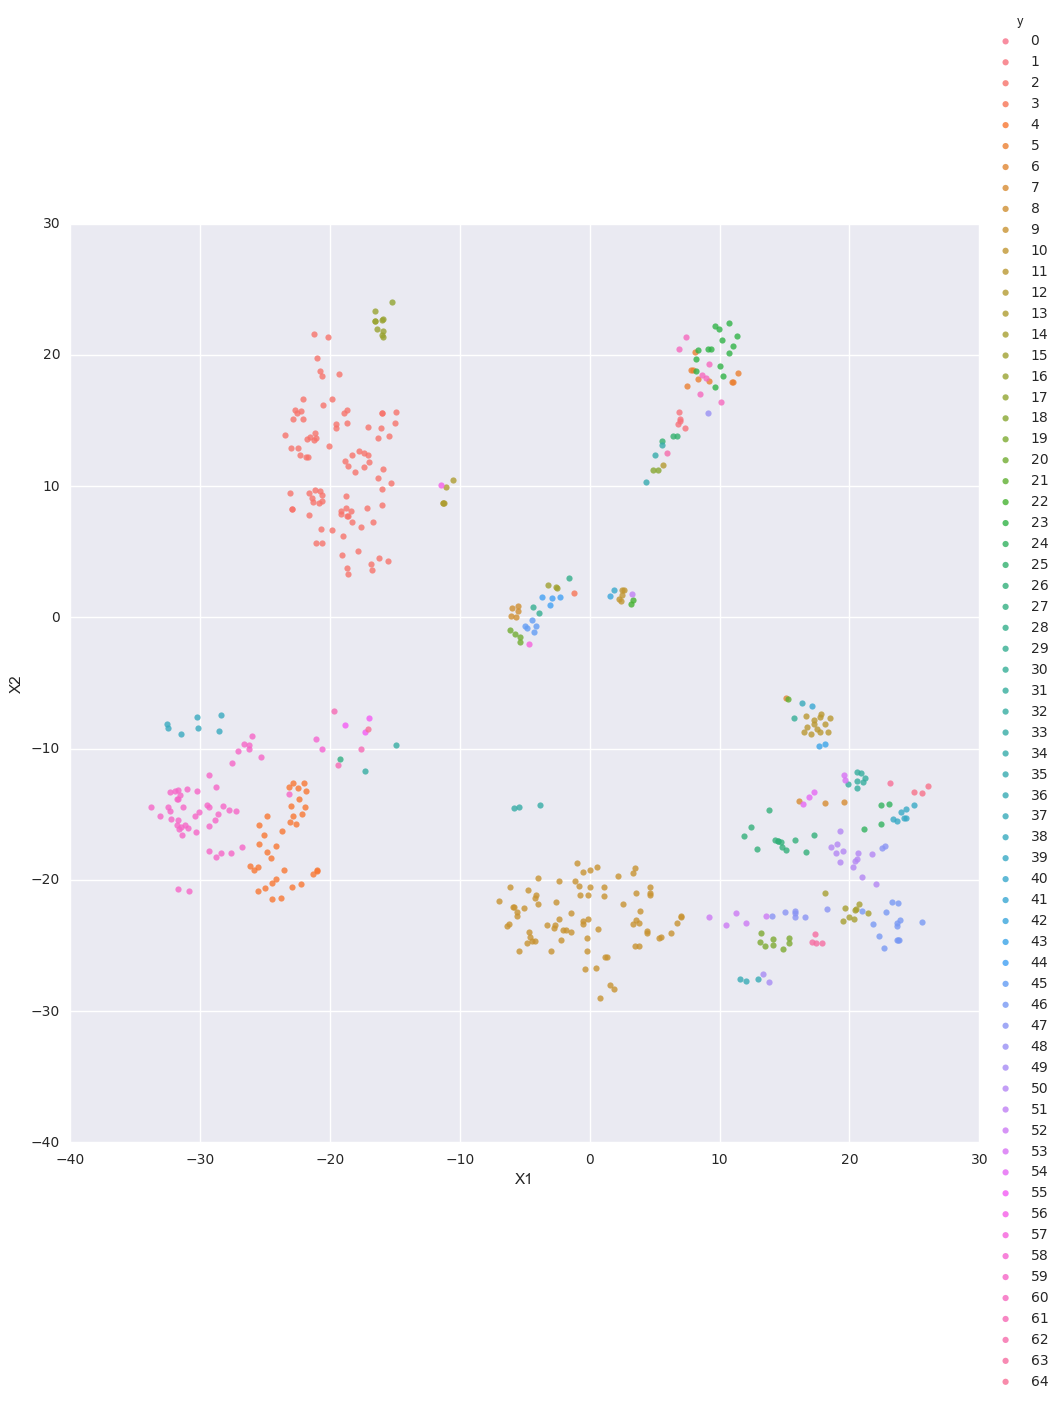

In [1136]:
gloc4_tsne = TSNE(n_components=2)
geoc4_stand = StandardScaler().fit_transform(gloc_hist_alt[['lat4','lng4']])

loc4_tsne = gloc4_tsne.fit_transform(geoc4_stand)
loc4_tsne_df = pd.DataFrame({'X1':loc4_tsne[:,0], 'X2':loc4_tsne[:,1],'y':ltkm.labels_})

sns.lmplot('X1','X2',data=loc4_tsne_df, fit_reg=False,hue='y', size=10)

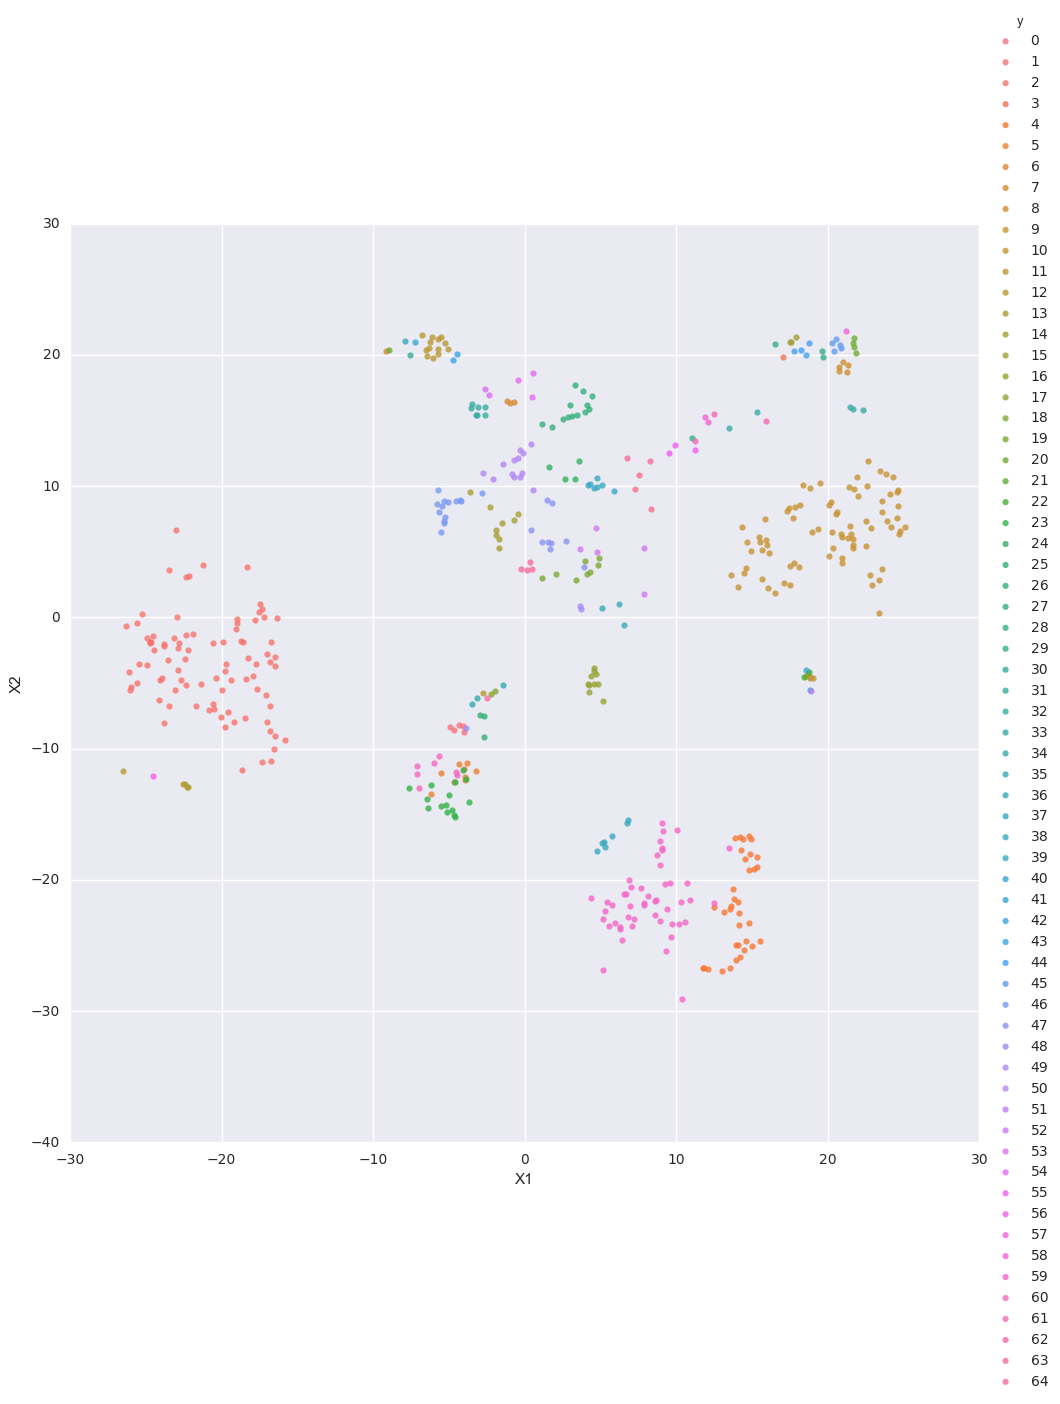

In [1137]:
gloc5_tsne = TSNE(n_components=2)
geoc5_stand = StandardScaler().fit_transform(gloc_hist_alt[['lat5','lng5']])

loc5_tsne = gloc5_tsne.fit_transform(geoc5_stand)
loc5_tsne_df = pd.DataFrame({'X1':loc5_tsne[:,0], 'X2':loc5_tsne[:,1],'y':ltkm.labels_})

sns.lmplot('X1','X2',data=loc5_tsne_df, fit_reg=False,hue='y', size=10)

In [1138]:
poi_id_list = gloc_hist_alt['poi_id'].value_counts().to_frame(name='Count').reset_index()

In [1139]:
poi_id_list.head(10)

,index,Count
0,2,89
1,9,78
2,59,49
3,4,35
4,23,15
5,46,14
6,11,13
7,50,13
8,26,13
9,5,9


In [1140]:
poi_sig = poi_id_list['Count'].describe()

In [1141]:
poi_sig

count    65.000000
mean      7.723077
std      15.622007
min       1.000000
25%       1.000000
50%       3.000000
75%       7.000000
max      89.000000
Name: Count, dtype: float64

In [1142]:
min_sig = poi_sig.ix['mean']+poi_sig.ix['std']

if len(poi_id_list[(poi_id_list['Count']>min_sig)]['index'].values) < 2:
    min_sig = poi_sig.ix['mean']+poi_sig.ix['std']
else:
    min_sig = poi_sig.ix['mean']+(poi_sig.ix['std']*2)

In [1143]:
poi_sig.ix['mean']+poi_sig.ix['std']

23.345084328804759

In [1144]:
min_sig

38.967091734532595

In [1145]:
poi_id_list[(poi_id_list['Count']>min_sig)]['index']

0     2
1     9
2    59
Name: index, dtype: int64

In [1146]:
poi_points = poi_id_list[(poi_id_list['Count']>min_sig)]['index'].values

In [1147]:
if len(poi_points)<2:
    min_sig = poi_sig.ix['mean']+poi_sig.ix['std']
    poi_points = poi_id_list[(poi_id_list['Count']>min_sig)]['index'].values

poi_points

array([ 2,  9, 59])

In [1148]:
# The value counts of the POI id's shows us there are three locations in particular that may be of 
# high interest to the user. 

In [1149]:
def showmap(maplat,maplng,zoom=16):

    from IPython.display import IFrame
    from IPython.core.display import display

    # Google Maps URL template for an iframe

    maps_url = "http://maps.google.com/maps?q={0}+{1}&z={2}&output=embed&iwloc=near".format(maplat,maplng,zoom)
#    maps_url = "http://maps.googleapis.com/maps/api/staticmap?center={0},{1}&size=400x300&zoom=14".format(maplat,maplng)
#    maps_url = "https://www.google.com/maps/embed?pb={0}+{1}&z={2}&output=embed".format(maplat,maplng,zoom)

#    print maps_url

    display(IFrame(maps_url, '400px', '300px'))

In [1150]:
# Sample Geographic Location Visualization

#for n in poi_id_list[:5]['index']:
for n in poi_points:

    mean_lat = gloc_hist_alt[(gloc_hist_alt['poi_id']==n)]['lat'].mean()
    mean_lng = gloc_hist_alt[(gloc_hist_alt['poi_id']==n)]['lng'].mean()

    print mean_lat,mean_lng
    showmap(mean_lat,mean_lng)

34.0664876966 -118.314874163


34.0603177295 -118.281065336


34.0312357367 -118.265766971


###  ------------ END of LBC Subsection - EDA - Finding POI ---------------

In [1151]:
# Next thing to do :
# Break down timestamps for each location and run cluster on timestamps to see if there is periodic significance

# Method Version 1.0
# Get day of the week and hour of the day value counts and basic stats (mean/median/std/quartiles via
# the built-in describe() method). 
# 1. Tests for signficant day of the week
#     - std less than or equal to 1
#          - if 1, would be the location is at best visited the same number of times across multiple days
#          - if less than 1, would indicate low variance in the day of the week on which the user visits
#            the location. An ideal target for recollection.

In [1152]:
gloc_hist_alt['timestamp'] = pd.to_datetime(gloc_hist_alt['timestamp'])

In [1153]:
gloc_hist_alt['dotw'] = [gldt.dayofweek for gldt in gloc_hist_alt['timestamp']]
gloc_hist_alt['hotd'] = [gldt.hour for gldt in gloc_hist_alt['timestamp']]

In [1154]:
gloc_hist_alt.head(4)

,timestamp,lat,lng,acc,vel,heading,altitude,v_acc,lat4,lng4,lat5,lng5,poi_id,dotw,hotd
0,2016-11-07 18:07:21,34.066386,-118.314777,5,0,0,63,16,34.0664,-118.3148,34.06639,-118.31478,2,0,18
1,2016-11-07 18:07:21,34.066391,-118.314760,34,0,0,0,0,34.0664,-118.3148,34.06639,-118.31476,2,0,18
2,2016-11-07 17:23:39,34.036402,-118.308978,10,2,238,58,24,34.0364,-118.3090,34.03640,-118.30898,31,0,17
3,2016-11-07 14:43:53,34.031227,-118.265898,53,0,0,0,0,34.0312,-118.2659,34.03123,-118.26590,59,0,14


6    28
5    20
4    12
2     9
0     9
1     6
3     5
Name: dotw, dtype: int64
count    89.000000
mean      3.988764
std       2.053237
min       0.000000
25%       2.000000
50%       5.000000
75%       6.000000
max       6.000000
Name: dotw, dtype: float64
----------------------
18    11
8      8
19     7
17     7
2      7
23     6
21     6
20     6
15     5
22     5
9      5
7      4
0      4
10     3
1      2
13     2
11     1
Name: hotd, dtype: int64
count    89.000000
mean     13.921348
std       7.176706
min       0.000000
25%       8.000000
50%      17.000000
75%      20.000000
max      23.000000
Name: hotd, dtype: float64
----------------------
Axes(0.125,0.125;0.775x0.775)


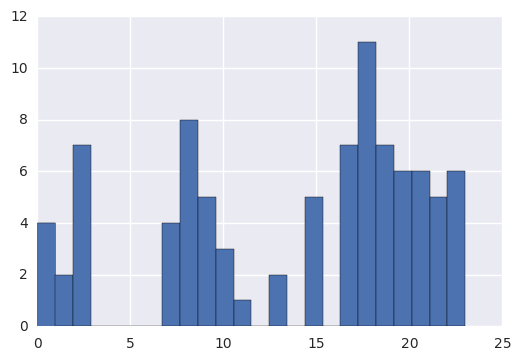

6    45
5    32
0     1
Name: dotw, dtype: int64
count    78.000000
mean      5.512821
std       0.801680
min       0.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       6.000000
Name: dotw, dtype: float64
----------------------
12    15
11    11
13     9
9      9
19     7
21     6
20     5
17     5
22     3
14     3
15     2
10     2
23     1
Name: hotd, dtype: int64
count    78.000000
mean     14.410256
std       4.234785
min       9.000000
25%      11.000000
50%      13.000000
75%      19.000000
max      23.000000
Name: hotd, dtype: float64
----------------------
Axes(0.125,0.125;0.775x0.775)


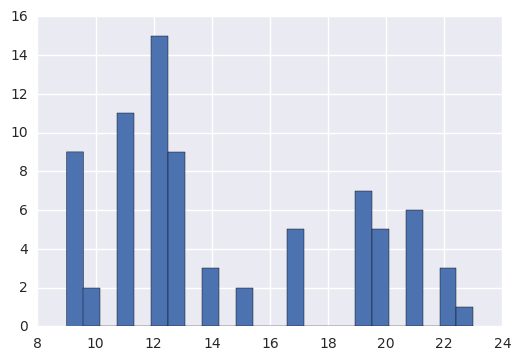

3    12
1    12
4    10
2     8
0     7
Name: dotw, dtype: int64
count    49.000000
mean      2.122449
std       1.378898
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: dotw, dtype: float64
----------------------
13    12
9      8
14     7
8      7
17     5
16     4
15     2
12     2
10     2
Name: hotd, dtype: int64
count    49.000000
mean     12.346939
std       3.003824
min       8.000000
25%       9.000000
50%      13.000000
75%      14.000000
max      17.000000
Name: hotd, dtype: float64
----------------------
Axes(0.125,0.125;0.775x0.775)


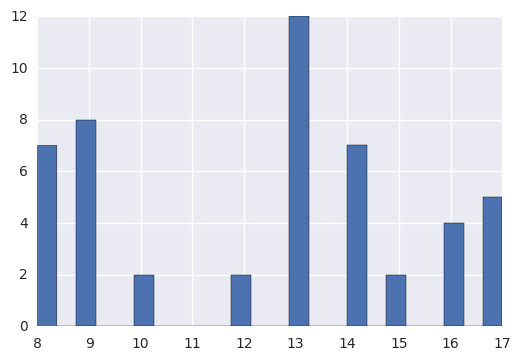

In [1155]:
for n in poi_points:
    print gloc_hist_alt[(gloc_hist_alt['poi_id']==n)]['dotw'].value_counts()
    print gloc_hist_alt[(gloc_hist_alt['poi_id']==n)]['dotw'].describe()
    print "----------------------"
    print gloc_hist_alt[(gloc_hist_alt['poi_id']==n)]['hotd'].value_counts()
    print gloc_hist_alt[(gloc_hist_alt['poi_id']==n)]['hotd'].describe()
    print "----------------------"
    print gloc_hist_alt[(gloc_hist_alt['poi_id']==n)]['hotd'].hist(bins=24)
    plt.show()
    print "======================"

In [1156]:
pd.DataFrame(gloc_hist_alt[(gloc_hist_alt['poi_id']==4)]['hotd'].describe())

,hotd
count,35.000000
mean,12.685714
std,2.836438
min,8.000000
25%,12.000000
50%,13.000000
75%,13.000000
max,17.000000


In [1157]:
gloc_hist_alt[(gloc_hist_alt['poi_id']==1)]

,timestamp,lat,lng,acc,vel,heading,altitude,v_acc,lat4,lng4,lat5,lng5,poi_id,dotw,hotd
267,2016-10-31 22:38:54,34.183475,-118.151055,10,0,109,340,3,34.1835,-118.1511,34.18348,-118.15105,1,0,22
268,2016-10-31 22:36:17,34.183575,-118.151127,10,2,342,338,6,34.1836,-118.1511,34.18357,-118.15113,1,0,22
301,2016-10-31 19:13:22,34.188972,-118.149960,5,14,21,363,3,34.1890,-118.1500,34.18897,-118.14996,1,0,19
302,2016-10-31 19:11:25,34.183005,-118.150837,10,0,0,338,24,34.1830,-118.1508,34.18300,-118.15084,1,0,19
303,2016-10-31 19:06:26,34.181169,-118.150743,5,13,358,337,4,34.1812,-118.1507,34.18117,-118.15074,1,0,19


In [1158]:
for poi_loc in poi_points:
    print gloc_hist_alt[(gloc_hist_alt['poi_id']==poi_loc)]['dotw'].value_counts()
    print gloc_hist_alt[(gloc_hist_alt['poi_id']==poi_loc)]['dotw'].describe()

6    28
5    20
4    12
2     9
0     9
1     6
3     5
Name: dotw, dtype: int64
count    89.000000
mean      3.988764
std       2.053237
min       0.000000
25%       2.000000
50%       5.000000
75%       6.000000
max       6.000000
Name: dotw, dtype: float64
6    45
5    32
0     1
Name: dotw, dtype: int64
count    78.000000
mean      5.512821
std       0.801680
min       0.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       6.000000
Name: dotw, dtype: float64
3    12
1    12
4    10
2     8
0     7
Name: dotw, dtype: int64
count    49.000000
mean      2.122449
std       1.378898
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: dotw, dtype: float64


In [1159]:
gloc_hist_alt[(gloc_hist_alt['poi_id']==1)]['dotw'].describe()

count    5.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: dotw, dtype: float64

In [1160]:
# Build a DataFrame of the basic stats values using the .describe method for each of the
# datetime frequency based columns in the poi dataframe. 

poi_dotw_df_list = []

for n_poi in range(0,len(poi_points)):
    print n_poi
    poi_dotw_df_list.append(gloc_hist_alt[(gloc_hist_alt['poi_id']==poi_points[n_poi])]['dotw'].describe().values)

0
1
2


In [1161]:
poi_freq_cols = ['count','mean','std','min','25p','50p','75p','max']

In [1162]:
poi_dotw_df_list

[array([ 89.        ,   3.98876404,   2.05323681,   0.        ,
          2.        ,   5.        ,   6.        ,   6.        ]),
 array([ 78.        ,   5.51282051,   0.80167989,   0.        ,
          5.        ,   6.        ,   6.        ,   6.        ]),
 array([ 49.        ,   2.12244898,   1.37889831,   0.        ,
          1.        ,   2.        ,   3.        ,   4.        ])]

In [1163]:
poi_freq_df = pd.DataFrame(poi_dotw_df_list,columns=poi_freq_cols, index=[poi_points])

In [1164]:
poi_freq_df

,count,mean,std,min,25p,50p,75p,max
2,89.0,3.988764,2.053237,0.0,2.0,5.0,6.0,6.0
9,78.0,5.512821,0.801680,0.0,5.0,6.0,6.0,6.0
59,49.0,2.122449,1.378898,0.0,1.0,2.0,3.0,4.0


In [1165]:
poi_points

array([ 2,  9, 59])

In [1166]:
# NEED TO GET DAYS OF THE WEEK AND WEEKDAY/WEEKEND ONLY FLAGS and ADD TO poi_freq_df OR NEW DF

dayfreq_list = []

cols = ['weekday_visits','weekend_visits','weekday_only','weekend_only']

for poi_loc in poi_points:
    
    on_weekends = []
    on_weekdays = []
    visit_weekends = []
    visit_weekdays = []
    weekdays_only = []
    weekends_only = []

    weekdays = (0,1,2,3,4)
    weekends = (5,6)
    
    for dotw in gloc_hist_alt[(gloc_hist_alt['poi_id']==poi_loc)]['dotw'].value_counts().index:
        if dotw in weekends:
            on_weekends.append(dotw)
        if dotw in weekdays:
            on_weekdays.append(dotw)

    visit_weekends.append(len(on_weekends)==0)
    visit_weekdays.append(len(on_weekdays)==0)
    weekdays_only.append((len(on_weekends)==0) & (len(on_weekdays)>0))
    weekends_only.append((len(on_weekdays)==0) & (len(on_weekends)>0))
    
    dayfreq_list.append([on_weekdays,on_weekends,weekdays_only,weekends_only])

poi_dayfreq_df = pd.DataFrame(dayfreq_list, columns=cols,index=[poi_points])

In [1167]:
poi_dayfreq_df['weekday_only'] = [item[0] for item in poi_dayfreq_df['weekday_only']]
poi_dayfreq_df['weekend_only'] = [item[0] for item in poi_dayfreq_df['weekend_only']]

In [1168]:
poi_dayfreq_df

,weekday_visits,weekend_visits,weekday_only,weekend_only
2,"[4, 2, 0, 1, 3]","[6, 5]",False,False
9,[0],"[6, 5]",False,False
59,"[3, 1, 4, 2, 0]",[],True,False


In [1169]:
poi_main_df = pd.concat([poi_freq_df, poi_dayfreq_df], axis=1)

In [1170]:
poi_main_df

,count,mean,std,min,25p,50p,75p,max,weekday_visits,weekend_visits,weekday_only,weekend_only
2,89.0,3.988764,2.053237,0.0,2.0,5.0,6.0,6.0,"[4, 2, 0, 1, 3]","[6, 5]",False,False
9,78.0,5.512821,0.801680,0.0,5.0,6.0,6.0,6.0,[0],"[6, 5]",False,False
59,49.0,2.122449,1.378898,0.0,1.0,2.0,3.0,4.0,"[3, 1, 4, 2, 0]",[],True,False


In [1171]:
selected_poi_for_freq_query = poi_freq_df['std'].idxmin()

most_freq_dotw_for_pot = gloc_hist_alt[(gloc_hist_alt['poi_id']==selected_poi_for_freq_query)]['dotw'].value_counts().index[0]

print "The POI ID of the location with the highest recollection potential is:", selected_poi_for_freq_query
print "The user most commonly visits the POI with HRP on:",calendar.day_name[most_freq_dotw_for_pot]
if poi_main_df['weekday_only'].ix[selected_poi_for_freq_query]:
    print "This POI occurs only on weekdays"
elif poi_main_df['weekend_only'].ix[selected_poi_for_freq_query]:
    print "This POI occuts only on weekends"

The POI ID of the location with the highest recollection potential is: 9
The user most commonly visits the POI with HRP on: Sunday


# =============== END LBC ================

# ======= LBC Generation ========

This is a rough implementation of the Location Based Challenge module for SG1. 

Expected final implementation will be a LBC class which will include measures to destroy the instance after use or upon expiration so that data does not reside in memory. 

In [1172]:
# Password tokenization

import time
import hashlib

# Run Once
#testdev = ''.join(random.choice('0123456789') for i in range(15))   # 15-digit length of IMEI
#testdev = testdev + testdev[0] # Add copy of first digit to create 16-digit key

token = 'a'

def tokemon(devid = testdev):
    to_encode = devid + str(int(round(time.time())))
    encoded = hashlib.sha224(to_encode).hexdigest()
    global token
    token = encoded
    return token

In [1173]:
# Version 0.1 - Basic LBC generation based on assumed data from above. 

# No parameters
# Data is assumed to inherently exist from processing/model applications above.
# This version of LBC is basing geolocation information solely from GPS coordinates
# obtained via Google Maps background locator data.

# Function will return LBC with hint if available along with randomized token for answer tokenization. 

# Secondary function will take LBC challenge answer and token and repond with authentication response. 

def genlbc(qtype='geo'):
    
    # There are different "classes" of location oriented questions that can be generated based
    # on user location behavior modeling. 
    
    # Location Frequency - What day(s) are you usually at {%location}?
    # Significant POI - On {%dotw}, where do you go most often? 

    # V0.2 - planned algorithms
    # Checked in POI - On {%dotw - expressed as "last {%dotw}}, where did you check in
    #                  for {%significant_event}
    #       > For significant event, look up place category (food, show/theater, etc)
    #         and cross reference TOD to obtain likely type of event for which the
    #         user checked in (ie: dinner, show/concert, etc)
    #       > This will need to try to avoid Facebook check-ins as much as possible
    #         as this type of security measure will be circumvented if the answers are
    #         plainly visible on a public feed. LBC should be generated with as user-specific
    #         data as possible that is not public.

    if qtype=='geo':
        hint = "none"
        if poi_main_df['weekday_only'].ix[selected_poi_for_freq_query]==True:
            question = "What day(s) do you visit this place/area most often? "
            global valid_answer
            valid_answer = 'weekdays'
        elif poi_main_df['weekend_only'].ix[selected_poi_for_freq_query]==True:
            question = "What day(s) do you visit this place/area most often? "
            global valid_answer
            valid_answer = 'weekends'
        else:
            question = "What day(s) do you visit this place/area most often? "
            valid_answer = calendar.day_name[most_freq_dotw_for_pot].lower()
            
        challenge = [question, hint]
        gen_token = tokemon()

        return challenge, gen_token
    else:
        return False

In [1174]:
def passlbc(answer,passed_token):
    
    # Validate token first
    
    if passed_token != token:
        return 0
    else:
        global valid_answer
        if answer==valid_answer:
            return 1
        if answer!=valid_answer:
            return -1

In [1175]:
# Test function to query user and try authenticating.
import string


def lbc_auth(method='geoloc'):

    if method=='geoloc':
        mean_lat = gloc_hist_alt[(gloc_hist_alt['poi_id']==selected_poi_for_freq_query)]['lat'].mean()
        mean_lng = gloc_hist_alt[(gloc_hist_alt['poi_id']==selected_poi_for_freq_query)]['lng'].mean()

        lbc_query,lbc_token = genlbc('geo')
        for attempt_number in range(0,3):
            if attempt_number > 0:
                try:
                    # Show user a hint if available
                    if lbc_query[1]!="none":
                        print lbc_query[0]
                        raw_response = raw_input(hint)
                    else:
                        raw_response = raw_input(lbc_query[0])
                except:
                    # No hint available
                    raw_response = raw_input(lbc_query[0])
            else:
                showmap(mean_lat,mean_lng)
                raw_response = raw_input(lbc_query[0])            
            response = raw_response.lower().translate(None, string.punctuation)
            attempt = passlbc(response,lbc_token)
            if attempt==1:
                print "Login OK - You have been identified as an authorized user."
                break
            elif attempt==-1:
                print "Authenticated failed. Please try again."
            elif attempt==0:
                print "Insecure authentication attempt detected. System may be compromised."
                break
        if (attempt_number==2) and (attempt != 1):
            print "Access Denied."
    else:
        print "Other methods in progress"

## === LBC Tests ===

In [1176]:
lbc_auth('geoloc')

What day(s) do you visit this place/area most often? sunday
Login OK - You have been identified as an authorized user.
